In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from run_templates import *
from run_latent_templates import *

In [4]:
conf = ffhq128_autoenc_latent()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to('cuda:3');

Global seed set to 0


Model params: 174.44 M
loading pretrain ... 130M
step: 1019986
_IncompatibleKeys(missing_keys=['model.latent_net.time_embed.0.weight', 'model.latent_net.time_embed.0.bias', 'model.latent_net.time_embed.2.weight', 'model.latent_net.time_embed.2.bias', 'model.latent_net.layers.0.linear.weight', 'model.latent_net.layers.0.linear.bias', 'model.latent_net.layers.0.linear_emb.weight', 'model.latent_net.layers.0.linear_emb.bias', 'model.latent_net.layers.0.cond_layers.1.weight', 'model.latent_net.layers.0.cond_layers.1.bias', 'model.latent_net.layers.0.norm.weight', 'model.latent_net.layers.0.norm.bias', 'model.latent_net.layers.1.linear.weight', 'model.latent_net.layers.1.linear.bias', 'model.latent_net.layers.1.linear_emb.weight', 'model.latent_net.layers.1.linear_emb.bias', 'model.latent_net.layers.1.cond_layers.1.weight', 'model.latent_net.layers.1.cond_layers.1.bias', 'model.latent_net.layers.1.norm.weight', 'model.latent_net.layers.1.norm.bias', 'model.latent_net.layers.2.linear.weight'

In [5]:
conf.T_eval = 50
conf.latent_T_eval = 100

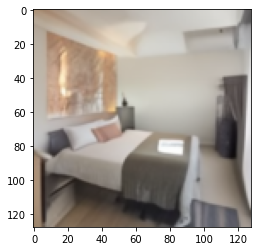

In [35]:
import matplotlib.pyplot as plt
# torch.manual_seed(1)
img = model.sample(1, device='cuda:3')
plt.imshow(img[0].permute(1, 2, 0).cpu())